# Importing Necessary Modules

In [10]:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# KNN class for 2D points

In [11]:
class KNN_2D():
    '''
        A class for KNN classifier for 2D points.
        ...
        Attributes:
            points: A list of 2D points.
        Methods:
            fit: Breaks the feature and target into points and labels
            get_distance: Returns square of euclidean distance
            find_k_nearset_points: Returns the K nearest points of a given point.
            predict: Find K nearest points and return the target with maximum frequency.

    '''

    def __init__(self):
        self.points = []

    def get_distance(self, a, b):
        '''
            Returns square of euclidean distance
            Parameter:
                a,b: The points to find the distance between.
            Returns:
                Square of euclidean distance.
        '''
        #return (a[0]-b[0])**2+(a[1]-b[1])**2
        return abs(a[0]-b[0])+abs(a[1]-b[1])

    def find_k_nearset_points(self, point, K):
        '''
            Returns the K nearest points of a given point.
            Parameter:
                point: The point to find the nearest points of.
                K: number of nearest point.
            Returns:
                List of K nearest points sorted by euclidean distance.
        '''
        distance_list = []
        for old_point in self.points:
            distance_list.append(
                (self.get_distance(point, old_point[0]), old_point))
        distance_list.sort()
        return distance_list[:K]

    def fit(self, X, y):
        '''
            Breaks the feature and target into points and labels 
            and append them to the points list.
            Parameter:
                X: The feature.
                y: The target.
            Returns:
                None
        '''
        for a, b in zip(X, y):
            self.points.append(((a[0], a[1]), b))

    def predict(self, point, K):
        '''
            Find K nearest points and return the target with maximum frequency.
            Parameter:
                point: The point to predict the target.
                K: number of nearest point.
            Returns:
                The target with maximum frequency.
        '''
        neighbors = self.find_k_nearset_points(point, K)
        frequency = dict()
        for item in neighbors:
            frequency[item[1][1]] = frequency.get(item[1][1], 0) + 1
        max_frequnecy = max(frequency, key=frequency.get)
        return max_frequnecy


# Using diabetes dataset and taking blood pressure and Age as features.

In [12]:
dataset = pd.read_csv('./diabetes.csv')
X = dataset.iloc[:50, [2, 7]].values
y = dataset.iloc[:50, 8].values


# Fitting Dataset

In [13]:
knn = KNN_2D()
knn.fit(X, y)


Taking Input feature

In [14]:
in_x, in_y = map(int, input("Enter Point(x,y):").split())
K = int(input("How many Nearest Values:"))


# Predicting Output

In [15]:
output = knn.predict((in_x, in_y), K)


# Visualization of the data for better Understanding

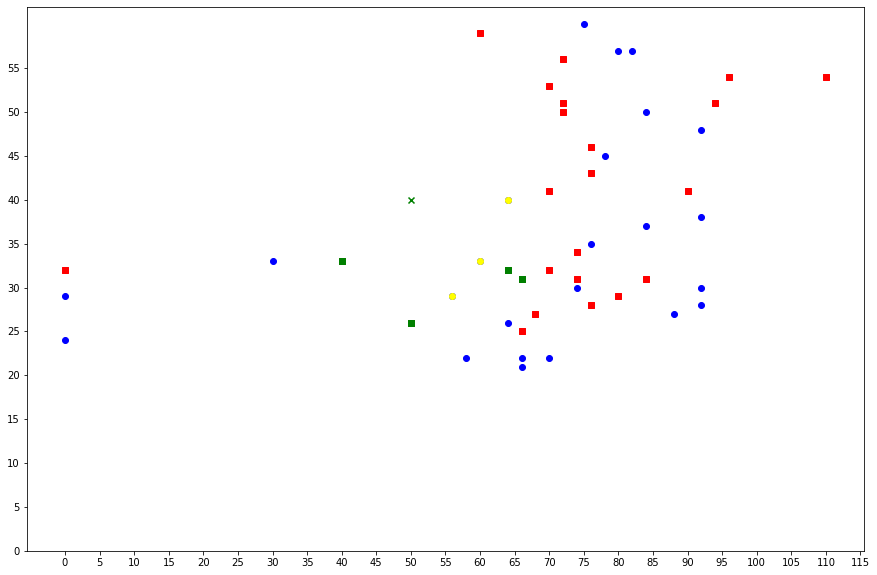

In [17]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
for (feature, target) in knn.points:
    plt.scatter(feature[0], feature[1], marker='s' if target ==
                1 else 'o', color='red' if target == 1 else 'blue')
neighbors = knn.find_k_nearset_points((in_x, in_y), K)
for (distance, (feature, target)) in neighbors:
    plt.scatter(feature[0], feature[1], marker='s' if target ==
                1 else 'o', color='green' if target == 1 else 'yellow')
plt.scatter(in_x, in_y, color='green' if output == 1 else 'yellow', marker='x')
plt.xticks(np.arange(0, 120, 5.0))
plt.yticks(np.arange(0, 60, 5.0))
plt.show()
